In [33]:
import numpy as np
import matplotlib.pyplot as plt
import yt, caesar
from modules.visualize.render_rgb import RenderRGB, SingleRender
import modules as anal
import modules.anal_func as anal_func

In [34]:
snap = 104
n = 60
sb = anal.Simba('cis', size='50_full')
z = sb.get_z_from_snap(snap)
print(f'Snap {snap} is at z={z}')
snapfile = sb.get_sim_file(snap)
catfile  = sb.get_caesar_file(snap)
print(snapfile)

Snap 104 is at z=1.022199708398802
/mnt/home/glorenzon/SIMBA_catalogs/simba50_snaps/full/snap_m50n512_104.hdf5


In [35]:
cs = sb.get_caesar(snap)
pos = np.asarray([i.pos for i in cs.galaxies])
ids  = np.asarray([i.GroupID for i in cs.galaxies])

yt : [INFO     ] 2024-10-25 15:42:21,686 Opening /mnt/home/glorenzon/SIMBA_catalogs/simba50_snaps/full//Groups/m50n512_104.hdf5
yt : [INFO     ] 2024-10-25 15:42:22,464 Found 66167 halos
yt : [INFO     ] 2024-10-25 15:42:23,755 Found 4868 galaxies


In [36]:
h = cs.simulation.scale_factor
merg_id = {}
for g in range(len(pos)):
    this = pos[g]
    d = np.sqrt((pos[:,0]*h-pos[:,0][g]*h)**2+(pos[:,1]*h-pos[:,1][g]*h)**2+(pos[:,2]*h-pos[:,2][g]*h)**2)
    mk = np.all([d>0, d<25], axis=0)
    for i in ids[mk]:
        if i not in merg_id:
            merg_id[ids[g]]=i
    
    
    

In [28]:
merg_id

{0: 4579,
 1: 4386,
 2: 3882,
 3: 4127,
 6: 3742,
 9: 4103,
 10: 4287,
 11: 4671,
 17: 2930,
 22: 4368,
 23: 3934,
 24: 4256,
 25: 4391,
 26: 4694,
 30: 4716,
 32: 3716,
 34: 3732,
 37: 3736,
 38: 4277,
 39: 4502,
 44: 4240,
 51: 4130,
 61: 4690,
 62: 4353,
 67: 2820,
 72: 3662,
 83: 4247,
 88: 2722,
 94: 2017,
 97: 3845,
 116: 2858,
 118: 4384,
 119: 3681,
 136: 4626,
 144: 4529,
 150: 4668,
 169: 3753,
 174: 3130,
 228: 981,
 234: 3721,
 242: 1485,
 244: 4439,
 268: 2318,
 279: 3016,
 291: 4349,
 297: 3319,
 342: 2381,
 344: 2934,
 356: 4505,
 383: 4814,
 423: 2493,
 443: 4451,
 444: 4708,
 469: 2849,
 472: 2518,
 546: 2707,
 557: 2068,
 559: 2836,
 570: 3116,
 581: 2124,
 586: 2120,
 609: 3016,
 656: 2419,
 711: 3351,
 753: 3667,
 810: 3368,
 833: 3430,
 983: 3857,
 1047: 2744,
 1055: 2419,
 1074: 4058,
 1143: 1397,
 1150: 2695,
 1200: 2951,
 1219: 4357,
 1220: 2325,
 1262: 4377,
 1277: 2070,
 1305: 4865,
 1396: 3634,
 1401: 3566,
 1428: 2598,
 1472: 4259,
 1478: 2254,
 1484: 2515,


yt : [INFO     ] 2024-10-25 15:42:56,806 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2024-10-25 15:42:56,820 Calculating time from 4.945e-01 to be 1.840e+17 seconds
yt : [INFO     ] 2024-10-25 15:42:56,822 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-10-25 15:42:56,929 Parameters: current_time              = 1.8402007737381914e+17 s
yt : [INFO     ] 2024-10-25 15:42:56,930 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-10-25 15:42:56,931 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-10-25 15:42:56,932 Parameters: domain_right_edge         = [50000. 50000. 50000.]
yt : [INFO     ] 2024-10-25 15:42:56,933 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-10-25 15:42:56,933 Parameters: current_redshift          = 1.0221997149755864
yt : [INFO     ] 2024-10-25 15:42:56,934 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-10-25 15:42:56,935 Parame

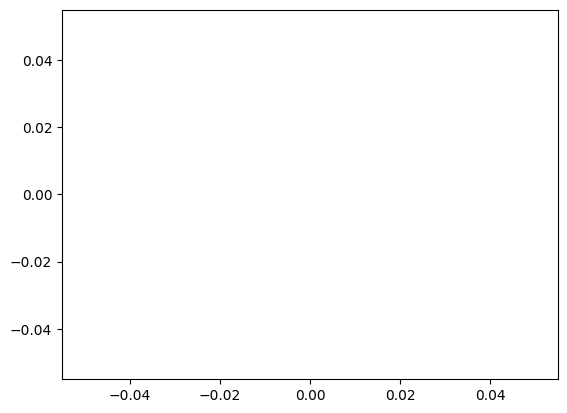

In [37]:
gal1 = [i for i in cs.galaxies][0]
gal2 = [i for i in cs.galaxies][4579]
merglist = gal1.glist + gal2.glist
ds = yt.load(snapfile)
ad = ds.all_data()
pos = ad['PartType0', 'Coordinates'].in_units('kpc').value[gal1.glist]
plt.scatter(pos[:, 0], pos[:, 2])
pos = ad['PartType0', 'Coordinates'].in_units('kpc').value[gal2.glist]
plt.scatter(pos[:, 0], pos[:, 2])